In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats

import statsmodels.api as sm

##### Task 3

In [2]:
# Import Data Set
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


##### Task 4

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

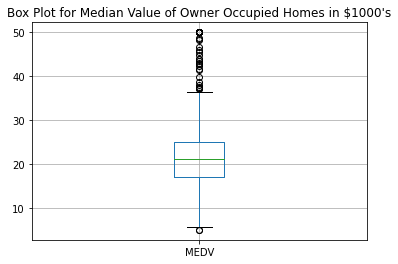

In [5]:
plt.title('Box Plot for Median Value of Owner Occupied Homes in $1000\'s')
boston_df.boxplot('MEDV')
plt.show()

In [6]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

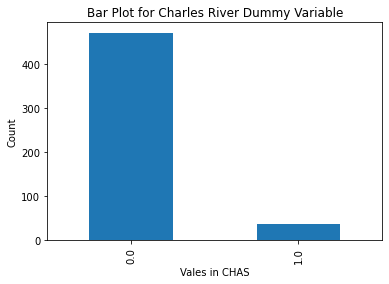

In [7]:
plt.title('Bar Plot for Charles River Dummy Variable')
plt.xlabel('Vales in CHAS')
plt.ylabel('Count')
boston_df['CHAS'].value_counts().plot.bar()
plt.show()

In [8]:
# Discretize the age variable

boston_df['AGE_GRP'] = boston_df['AGE'].apply(lambda x:'Young' if x<=35 else 'Mid' if x<70 else 'Old')

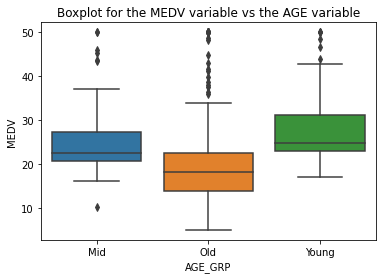

In [9]:
plt.title('Boxplot for the MEDV variable vs the AGE variable')
sns.boxplot(x='AGE_GRP',y='MEDV',data=boston_df)
plt.show()

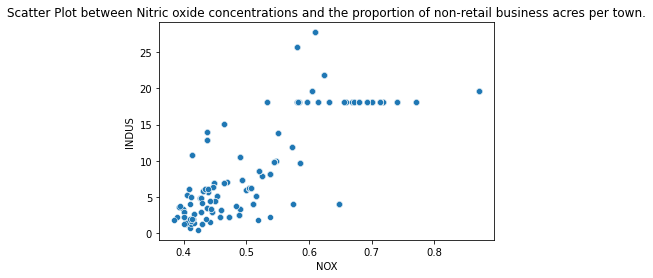

In [10]:
plt.title('Scatter Plot between Nitric oxide concentrations and the proportion of non-retail business acres per town.')
sns.scatterplot(x='NOX',y='INDUS',data=boston_df)
plt.show()

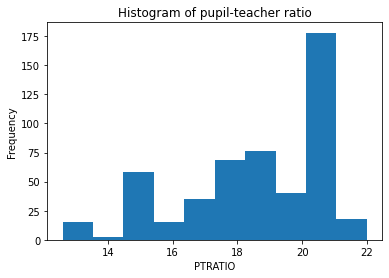

In [11]:
plt.title('Histogram of pupil-teacher ratio')
plt.xlabel('PTRATIO')
boston_df['PTRATIO'].plot.hist()
plt.show()

##### Task 5

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?

<b> Hypothesis </b>

<i>H<sub>0</sub> : $\mu$<sub>0</sub> = $\mu$<sub>1</sub></i> (There is no difference between median values of houses bounded by Charles River)

<i>H<sub>1</sub> : $\mu$<sub>0</sub> $\ne$ $\mu$<sub>1</sub></i> (There is 
difference between median values of houses bounded by Charles River)
    

In [12]:
# t-test
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

<b>Inference:</b><font style = "background-color:yellow">Since given $\alpha$ value is 0.05, and here p-value is less than $\alpha$ value, so we reject null hypothesis.</font>

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

<b> Hypothesis </b>

<i>H<sub>0</sub> : $\mu$<sub>0</sub> = $\mu$<sub>1</sub></i> (There is no difference in median values of houses for occupied units built prior to 1940.)

<i>H<sub>1</sub> : $\mu$<sub>0</sub> $\ne$ $\mu$<sub>1</sub></i> (There is difference in median values of houses for occupied units built prior to 1940.)

In [13]:
# Setting before and after 1940
boston_df.loc[(boston_df.AGE > 83), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 83), 'age_span'] = 'after 1940'

In [14]:
scipy.stats.levene(boston_df[boston_df.age_span=='before 1940']['MEDV'],
                  boston_df[boston_df.age_span=='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.4579006650725996, pvalue=0.22783076880742587)

<b>Inference:</b><font style = "background-color:yellow"> Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940.</font>

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


<b> Hypothesis </b>

<i>H<sub>0</sub> : $\mu$<sub>0</sub> = $\mu$<sub>1</sub></i> (There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.)

<i>H<sub>1</sub> : $\mu$<sub>0</sub> $\ne$ $\mu$<sub>1</sub></i> (There is relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.)
    

In [15]:
# Checking relationship
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

(0.7636514469209149, 7.913361061240043e-98)

<b>Inference:</b><font style = "background-color:yellow"> Since the p-value is greater than 0.05, we can reject the null hypothesis that there is no relationship between the nitric acid concentration and the proportion of non-retail business acres per town.</font>

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [16]:
# Creating Regression Model

X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        10:44:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Inference:</b><font style = "background-color:yellow"> There is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.</font>